In [ ]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [13]:
import pandas as pd
import numpy as np
from matplotlib import pyplot

# Read the CSV and Perform Basic Data Cleaning

In [2]:
df = pd.read_csv("./Resources/merged12_update.csv")
# Drop the null columns where all values are null
#df = df.dropna(axis='columns', how='all')
# Drop the null rows
#df = df.dropna()
df.replace(np.nan, 0)
df.head()

,GAME_SEQUENCE,GAME_ID,TEAM_ID,PTS_QTR1,PTS_QTR2,PTS_QTR3,PTS_QTR4,PTS_OT1,PTS_OT2,PTS_OT3,PTS_OT4,PTS,FG_PCT,FT_PCT,FG3_PCT,AST,REB,TOV,Playoffs
0,1,21200001,1610612764,24,15,23,22,0,0,0,0,84,0.356,0.600,0.250,26,39,12,0
1,1,21200001,1610612739,31,19,24,20,0,0,0,0,94,0.456,0.682,0.350,22,54,20,0
2,2,21200002,1610612738,25,29,22,31,0,0,0,0,107,0.520,0.821,0.462,24,41,15,1
3,2,21200002,1610612738,25,29,22,31,0,0,0,0,107,0.520,0.821,0.462,24,41,15,1
4,2,21200002,1610612738,25,29,22,31,0,0,0,0,107,0.520,0.821,0.462,24,41,15,1


# Create a Train Test Split

Use `Playoffs` for the y values

In [15]:
y=df["Playoffs"]
X=df.drop(columns=["Playoffs"])
X

,GAME_SEQUENCE,GAME_ID,TEAM_ID,PTS_QTR1,PTS_QTR2,PTS_QTR3,PTS_QTR4,PTS_OT1,PTS_OT2,PTS_OT3,PTS_OT4,PTS,FG_PCT,FT_PCT,FG3_PCT,AST,REB,TOV
0,1,21200001,1610612764,24,15,23,22,0,0,0,0,84,0.356,0.600,0.250,26,39,12
1,1,21200001,1610612739,31,19,24,20,0,0,0,0,94,0.456,0.682,0.350,22,54,20
2,2,21200002,1610612738,25,29,22,31,0,0,0,0,107,0.520,0.821,0.462,24,41,15
3,2,21200002,1610612738,25,29,22,31,0,0,0,0,107,0.520,0.821,0.462,24,41,15
4,2,21200002,1610612738,25,29,22,31,0,0,0,0,107,0.520,0.821,0.462,24,41,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15083,15,21201230,1610612744,24,26,16,33,0,0,0,0,99,0.430,0.769,0.429,21,52,12
15084,15,21201230,1610612744,24,26,16,33,0,0,0,0,99,0.430,0.769,0.429,21,52,12
15085,15,21201230,1610612744,24,26,16,33,0,0,0,0,99,0.430,0.769,0.429,21,52,12
15086,15,21201230,1610612744,24,26,16,33,0,0,0,0,99,0.430,0.769,0.429,21,52,12


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [5]:
X_train.shape, X_test.shape

((11316, 18), (3772, 18))

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [6]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Train the Model



In [7]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [8]:
classifier.fit(X_train_scaled, y_train)

LogisticRegression()

In [10]:
importance = classifier.coef_[0]
importance

array([ 0.30105996, -0.09668788, -2.21724537,  0.19135457,  0.61081264,
        0.05500472, -0.08914002,  0.26812065, -0.12703756, -0.92650582,
        0.        ,  0.16056554,  2.40989065,  0.59979933,  0.58546472,
       -1.35831106,  1.59912522, -0.734467  ])

In [11]:
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.30106
Feature: 1, Score: -0.09669
Feature: 2, Score: -2.21725
Feature: 3, Score: 0.19135
Feature: 4, Score: 0.61081
Feature: 5, Score: 0.05500
Feature: 6, Score: -0.08914
Feature: 7, Score: 0.26812
Feature: 8, Score: -0.12704
Feature: 9, Score: -0.92651
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.16057
Feature: 12, Score: 2.40989
Feature: 13, Score: 0.59980
Feature: 14, Score: 0.58546
Feature: 15, Score: -1.35831
Feature: 16, Score: 1.59913
Feature: 17, Score: -0.73447


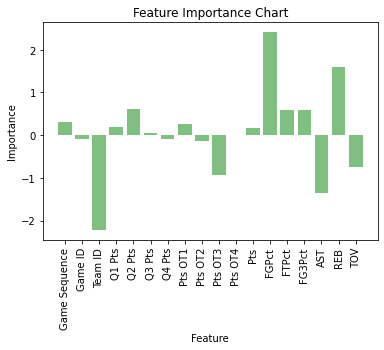

In [20]:
pyplot.bar([x for x in range(len(importance))], importance, color = 'g', alpha = 0.5, align = 'center')
tick_locations = [x for x in range(len(importance))]
pyplot.xticks(tick_locations, ["Game Sequence", "Game ID", "Team ID", "Q1 Pts", "Q2 Pts", "Q3 Pts", 
                            "Q4 Pts", "Pts OT1", "Pts OT2", "Pts OT3", "Pts OT4", "Pts", "FGPct", "FTPct","FG3Pct", "AST", "REB", "TOV"],
                              rotation = 'vertical')
pyplot.title("Feature Importance Chart")
pyplot.xlabel("Feature")
pyplot.ylabel("Importance")
pyplot.show()

In [24]:
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.9220572640509014
Testing Data Score: 0.9244432661717922
